In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="adam",
 metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1213 - accuracy: 0.9525 - val_loss: 0.4531 - val_accuracy: 0.8964
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9535 - val_loss: 0.4422 - val_accuracy: 0.9004
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9563 - val_loss: 0.4544 - val_accuracy: 0.8968
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1116 - accuracy: 0.9565 - val_loss: 0.5147 - val_accuracy: 0.8998
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9560 - val_loss: 0.4607 - val_accuracy: 0.9000
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9592 - val_loss: 0.4732 - val_accuracy: 0.8968
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9592 - val_loss: 0.4766 - val_accuracy:

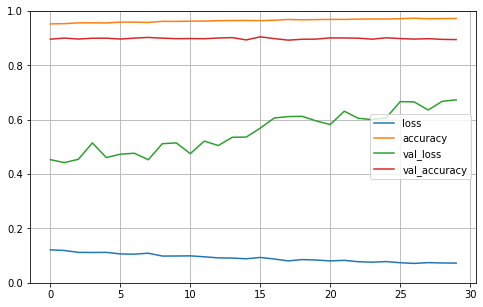

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 162.6172 - accuracy: 0.8593


[162.61717224121094, 0.8593000173568726]

In [23]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [26]:
import numpy as np
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')